### 빅데이터분석개론 토픽12
- 2024 . 07 . 03

--------

#### 12단원. pandas 데이터 분석

- numpy : ndarray를 제공, 한꺼번에 데이터 처리
- pandas : panel data의 약어
    - heterogeneous 자료형의 열을 가진 테이블 데이터 등을 다룸
    - 구조
        - series : 1차원 구조를 가진 하나의 열
        - dataframe : 복수의 열을 가진 2차원 데이터 (엑셀)
    - 전처리, 데이터 추가 및 삭제, 정렬, 조작에 편리한 패키지
    - numpy 의존 -> list, dict, ndarray를 df로 변환 가능
    
<br>

- 핵심 명령어
    - 데이터 보기 및 검사
        - mean : 모든 열의 평균
        - corr : 열 사이의 상관관계 (상관계수)
        - count : null이 아닌 값의 갯수
    - 필터, 정렬, 그룹화
        - soort_values() : 데이터 정렬
        - 조건 사용하여 열 필터링
        - groupby() : 기준에 따라 몇개의 그룹으로 데이터 분할
    - 데이터 정제
        - 누락값 확인
        - 특정 값을 다른 값으로 대체
        
<br>

- csv : 쉼표로 구분한 변수, 첫번째 행은 속성 (필수 아님), 개행하여 행(records)을 표현
- 파이썬 모듈 csv로도 csv 읽을 수 있음 

In [8]:
# csv 모듈로 데이터 읽기

import csv

# 한글이 깨지는 경우가 있으니 encoding을 cp949로
f = open('data/csv/weather.csv', 'r', encoding='cp949')
data = csv.reader(f) # csv 패키지로 읽기

cnt = 0
for row in data : 
    print (row)
    cnt += 1
    
    if cnt == 20 : 
        break

['일시', '평균기온(°C)', '최대 풍속(m/s)', '평균 풍속(m/s)']
['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']
['2010-08-03', '22.1', '6.3', '2.9']
['2010-08-04', '25.3', '6.6', '4.2']
['2010-08-05', '27.2', '9.1', '5.6']
['2010-08-06', '26.8', '9.8', '8']
['2010-08-07', '27.5', '9.1', '5']
['2010-08-08', '26.6', '5.9', '4']
['2010-08-09', '26.9', '5.1', '3.1']
['2010-08-10', '25.6', '10.2', '5.5']
['2010-08-11', '24.6', '9.4', '4.8']
['2010-08-12', '23.7', '8.7', '2.6']
['2010-08-13', '24.3', '10.9', '4.6']
['2010-08-14', '25', '10.8', '4.4']
['2010-08-15', '24.5', '16.9', '10.3']
['2010-08-16', '26.2', '9.8', '3.2']
['2010-08-17', '23.9', '4.2', '1.6']
['2010-08-18', '23.4', '4.2', '2.1']
['2010-08-19', '24.3', '4', '1.9']


In [13]:
# 만약 위의 열 중 '최대 풍속' 열만 보고 싶다면

f = open('data/csv/weather.csv', 'r', encoding='cp949')
data = csv.reader(f) # csv 패키지로 읽기

header = next(data) # 헤더를 제거 (2차원 리스트에서 다음 리스트로 이동하는 함수)

cnt = 0
for row in data : 
    print (row[2]) # 최대 풍속 열 (리스트니깐)
    cnt += 1
    
    if cnt == 20 : 
        break
        
$print ("제거한 헤더 : ", header)

8.3
8.7
6.3
6.6
9.1
9.8
9.1
5.9
5.1
10.2
9.4
8.7
10.9
10.8
16.9
9.8
4.2
4.2
4
5
제거한 헤더 :  ['일시', '평균기온(°C)', '최대 풍속(m/s)', '평균 풍속(m/s)']


{'08': [1114.799999999999, 310], '09': [1098.5, 300], '10': [1228.0999999999992, 310], '11': [1179.1999999999996, 300], '12': [1183.3, 310], '01': [1164.7999999999993, 310], '02': [1105.1000000000001, 280], '03': [1356.5999999999997, 309], '04': [1377.5, 298], '05': [1308.0000000000002, 310], '06': [1038.2999999999995, 300], '07': [1202.0000000000002, 310]}


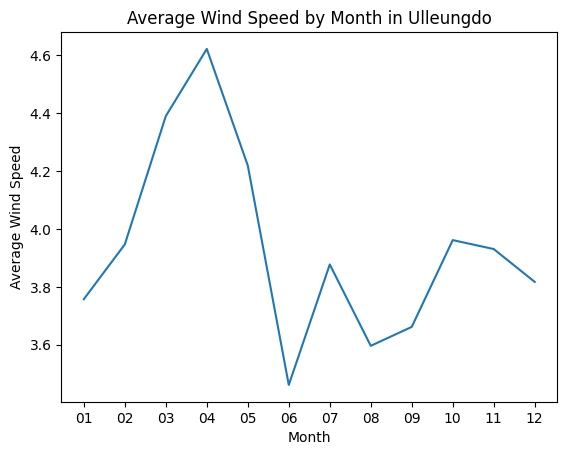

In [27]:
# 몇월에 울릉도에 가장 바람이 강한가 (평균 풍속)
# 월별로 평균

import matplotlib.pyplot as plt

f = open('data/csv/weather.csv', 'r', encoding='cp949')
data = csv.reader(f) # csv 패키지로 읽기
header = next(data) # 헤더 제거

dict_data = {}

for row in data : 
    if row[3] == '' :
        continue
        
    else : # [풍속의 합, counting]
        # print (row[0].split('-')[1])
        try :
            dict_data[row[0].split('-')[1]][0] += float(row[3])
            dict_data[row[0].split('-')[1]][1] += 1
        except : 
            dict_data[row[0].split('-')[1]] = [float(row[3]), 1]

print (dict_data)

for key in dict_data.keys() : # 평균내기
    dict_data[key][1] = dict_data[key][0] / dict_data[key][1]
    
data = list(dict_data.items())
data.sort() # 월별로 정렬

months = [x[0] for x in data]
wind_speeds = [x[1][1] for x in data]

plt.plot(months, wind_speeds)
plt.xlabel('Month')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed by Month in Ulleungdo')
plt.show()

------

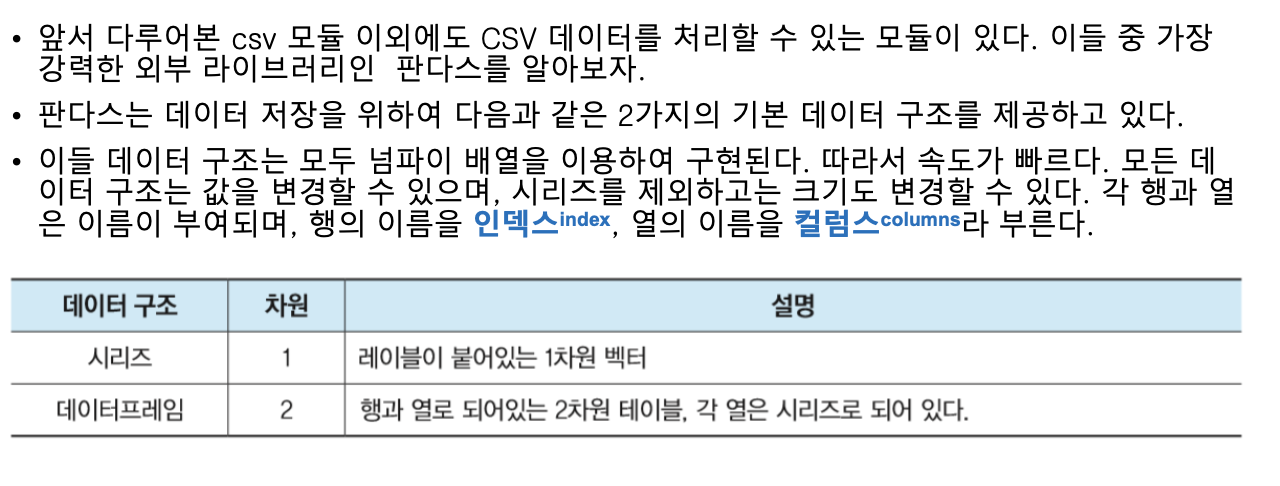

- 시리즈 : 1차원 배열, 레이블이 붙어있음
- 데이터프레임 : 행과 열이 있는 2차원 테이블, 각 열은 시리즈



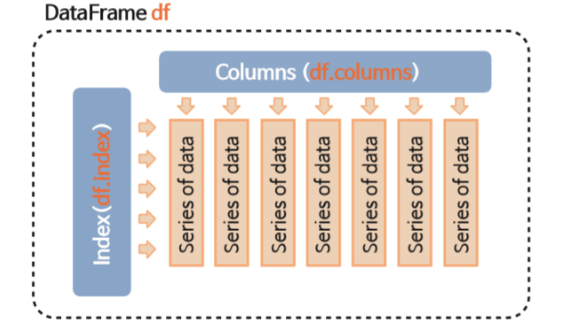

In [28]:
# 시리즈 : 1차원 배열
# 시리즈 만들 때는 함수에 리스트 넣음

import numpy as np
import pandas as pd

series = pd.Series([1, 3, 4, np.nan, 6, 8])
# np.nan : 값 없음 (Not a Number, NaN)
# nan은 실수형이라 나머지도 실수형이 됨 (float64)
print (series)

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [31]:
# 데이터프레임 : 시리즈를 엮어서 만듦 (열의 모임)
# 데이터프레임 만들때는 함수에 딕셔너리 넣음

name_series = pd.Series (['daramji', 'pachiritsu'])
age_series = pd.Series ([3, 2])
favorite_series = pd.Series (['ice cream', 'cute things'])

df = pd.DataFrame({'이름' : name_series, '나이' : age_series, '좋아하는 것' : favorite_series})
print(df) # 앞으로는 그냥 df라고만 친다

           이름  나이       좋아하는 것
0     daramji   3    ice cream
1  pachiritsu   2  cute things


In [63]:
# csv 파일 읽기

import pandas as pd
country = pd.read_csv('data/csv/countries.csv')

country # 인덱스 번호는 판다스가 추가한 열

,Unnamed: 0,country,area,capital,population
0,KR,Korea,98480,Seoul,51780579
1,US,USA,9629091,Washington,331002825
2,JP,Japan,377835,Tokyo,125960000
3,CN,China,9596960,Beijing,1439323688
4,RU,Russia,17100000,Moscow,146748600


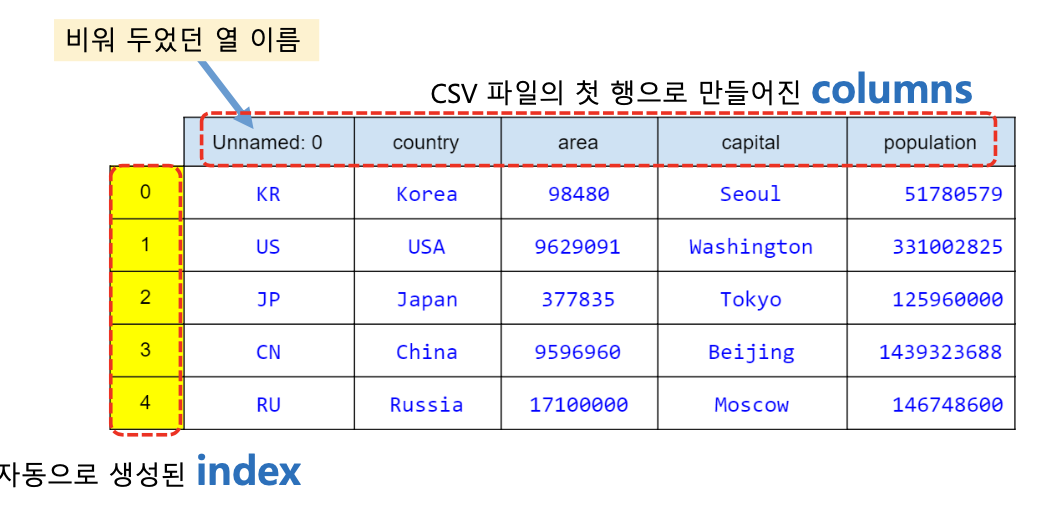

In [64]:
# 첫번째 열을 인덱스로 사용하기 위해서 index_col = 원하는시리즈번호

country = pd.read_csv('data/csv/countries.csv', index_col=0)

country # 이제부터 각 행의 인덱스는 0번째 열이 됨

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [65]:
# 두개의 열을 선택하여 추출
country[['area', 'country']] # 2차원 배열

,area,country
KR,98480,Korea
US,9629091,USA
JP,377835,Japan
CN,9596960,China
RU,17100000,Russia


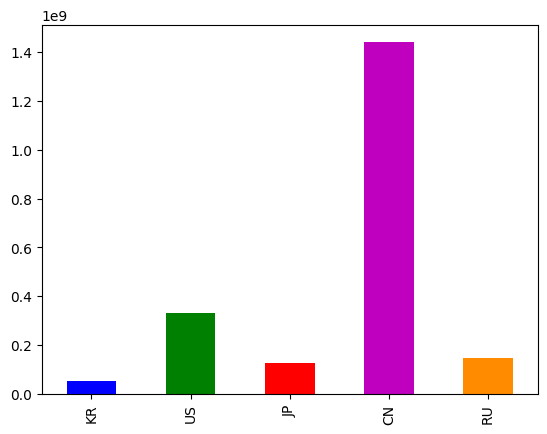

In [66]:
# 시리즈를 객체로 하여 바로 plot을 그릴 수 있음

country['population'].plot(kind = 'bar', color = ('b', 'g', 'r', 'm', 'darkorange'))
plt.show()

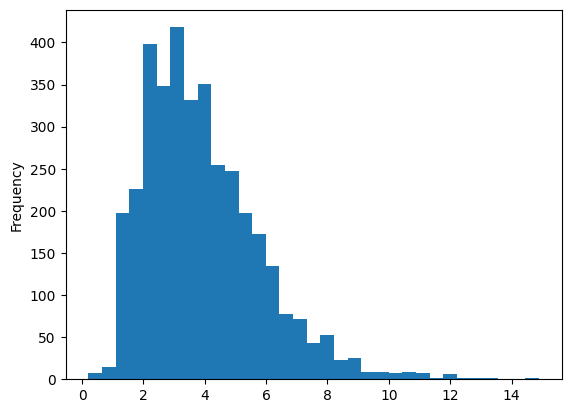

In [67]:
weather = pd.read_csv('data/csv/weather.csv', index_col = 0, encoding='CP949')
weather['평균 풍속(m/s)'].plot(kind = 'hist', bins=33)
plt.show() # 히스토그램

In [68]:
# 판다스도 슬라이싱 가능
country.head() # 첫번째부터 5개의 행

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [69]:
weather.tail() # 마지막에서부터 5번째 행 

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0
2020-07-30,22.9,9.7,2.4
2020-07-31,25.7,4.8,2.5


In [71]:
country[:3] # 0, 1, 2번째 행 보여줌

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000


In [72]:
country.loc['KR'] # KR 행만 선택 (인덱스)

country          Korea
area             98480
capital          Seoul
population    51780579
Name: KR, dtype: object

In [73]:
country['country'] # country 열만 선택

KR     Korea
US       USA
JP     Japan
CN     China
RU    Russia
Name: country, dtype: object

In [75]:
# 서로 동일한 표현이다

print(country.loc['KR', 'country']) # KR 행의 country 열
print(country['country'].loc['KR']) # KR 행의 country 열

Korea
Korea


In [76]:
# 열을 생성하기 -> 딕셔너리 추가하는 것과 비슷함
# density 열 추가하기

country['density'] = country['population'] / country['area'] # 인구수 / 면적
country

,country,area,capital,population,density
KR,Korea,98480,Seoul,51780579,525.797918
US,USA,9629091,Washington,331002825,34.375293
JP,Japan,377835,Tokyo,125960000,333.373033
CN,China,9596960,Beijing,1439323688,149.977044
RU,Russia,17100000,Moscow,146748600,8.581789


-----------

In [62]:
# 데이터프레임 간단 분석 -> describe()
# 통계량을 한꺼번에 계산함

weather.describe()

# std : 표준편차
# 25% ~ 75% : 사분위수

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


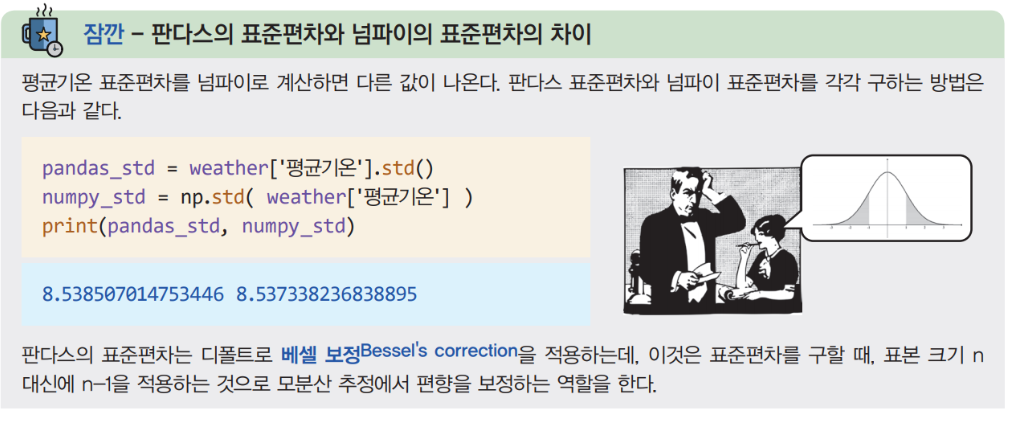

- 표준편차 구할 때
    - 분산 구하기
    - numpy : n으로 나눔
    - pandas : n-1으로 나눔 (베셀보정)

In [77]:
# 데이터 갯수 구하기

weather.count() # null이 아닌 데이터의 갯수

평균기온(°C)      3653
최대 풍속(m/s)    3649
평균 풍속(m/s)    3647
dtype: int64

In [82]:
# count, mean

print (weather[['최대 풍속(m/s)', '평균기온(°C)']].count())
print (weather[['최대 풍속(m/s)', '평균기온(°C)']].mean())

최대 풍속(m/s)    3649
평균기온(°C)      3653
dtype: int64
최대 풍속(m/s)     7.911099
평균기온(°C)      12.942102
dtype: float64


In [88]:
# groupby : 데이터가 동일하면 데이터를 묶는 것

weather = pd.read_csv('data/csv/weather.csv', encoding='cp949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month
means = weather.groupby('month').mean()
print (means)

# sum_data = weather.groupby('month').sum()
# print (sum_data)

TypeError: agg function failed [how->mean,dtype->object]

In [90]:
# filtering 
# 최대풍속의 값이 10이 넘는 값들 (boolean)
weather['최대 풍속(m/s)'] >= 10 # numpy의 논리 인덱싱과 동일한 문법

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Name: 최대 풍속(m/s), Length: 3653, dtype: bool

In [91]:
# 최대풍속의 값이 10이 넘는 값들의 행을 보여주기
weather[weather['최대 풍속(m/s)'] >= 10] # 실값

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
9,2010-08-10,25.6,10.2,5.5,8
12,2010-08-13,24.3,10.9,4.6,8
13,2010-08-14,25.0,10.8,4.4,8
14,2010-08-15,24.5,16.9,10.3,8
29,2010-08-30,26.2,10.5,6.2,8
...,...,...,...,...,...
3622,2020-07-01,16.8,19.7,8.7,7
3632,2020-07-11,20.1,10.3,4.1,7
3634,2020-07-13,17.8,10.3,4.6,7
3635,2020-07-14,17.8,12.7,9.4,7


-----------



In [96]:
# 결손값을 탐지하고 수정
# 중간에 NaN이나 NA 있으면 데이터 분석이 잘 되지 않기 때문에 전처리 필요

weather[weather['평균 풍속(m/s)'].isna()] # 결손값이 있는지 확인 (평균풍속)
# 위와 같이 작성하면 nan인 행을 보여줌

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
559,2012-02-11,-0.7,NaN,NaN,2
560,2012-02-12,0.4,NaN,NaN,2
561,2012-02-13,4.0,NaN,NaN,2
1694,2015-03-22,10.1,11.6,NaN,3
1704,2015-04-01,7.3,12.1,NaN,4
3182,2019-04-18,15.7,11.7,NaN,4


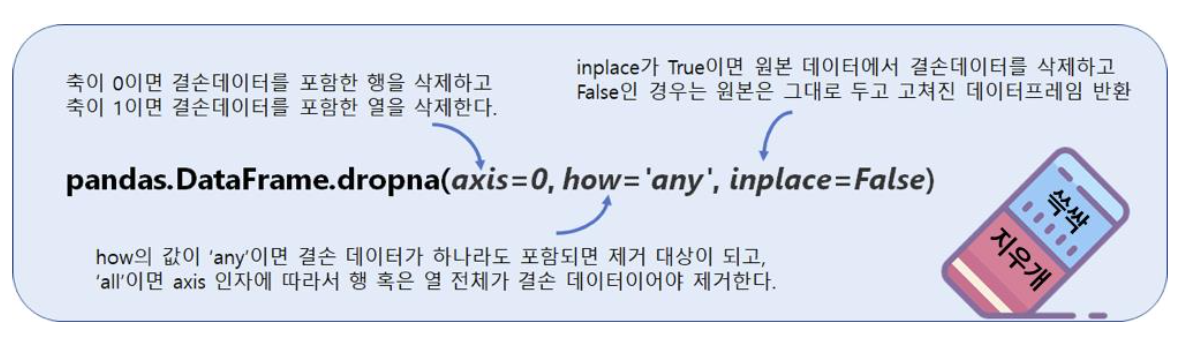

In [101]:
# 결손값이 있는 행을 drop

weather.dropna (axis=0, how='any', inplace=True)
weather[weather['평균 풍속(m/s)'].isna()] 

# 없음. nan인 값들 전부 삭제됨

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month


In [102]:
# 결손값이 있는 행을 fill

weather.fillna(0, inplace=True) # 결손값을 0으로 채움
# 보통은 평균으로 채움

--------

In [107]:
# 데이터 구조 변경하기

df_1 = pd.DataFrame({'item' : ['ring0', 'ring0', 'ring1', 'ring1'],
                    'price' : [20000, 10000, 50000, 30000], 
                    'type' : ['gold', 'silver', 'gold', 'bronze']})

df_2 = df_1.pivot(index='item', columns='type', values='price') 
# index, columns, values로 파라미터 가짐
print (df_2)

type    bronze     gold   silver
item                            
ring0      NaN  20000.0  10000.0
ring1  30000.0  50000.0      NaN


In [108]:
# 데이터 합치기

df_1 = pd.DataFrame( 
         {'A' : ['a10', 'a11', 'a12'], 
          'B' : ['b10', 'b11', 'b12'],
          'C' : ['c10', 'c11', 'c12']} , index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( 
         {'B' : ['b23', 'b24', 'b25'],
          'C' : ['c23', 'c24', 'c25'],
          'D' : ['d23', 'd24', 'd25']} , index = ['다', '라',  '마'] )

print( pd.concat( [df_1, df_2] , axis = 0, join = 'outer' ) )
print( pd.concat( [df_1, df_2] , axis = 0, join = 'inner' ) )
print( pd.concat( [df_1, df_2] , axis = 1, join = 'outer' ) )
print( pd.concat( [df_1, df_2] , axis = 1, join = 'inner' ) )

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25
     B    C
가  b10  c10
나  b11  c11
다  b12  c12
다  b23  c23
라  b24  c24
마  b25  c25
     A    B    C    B    C    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25
     A    B    C    B    C    D
다  a12  b12  c12  b23  c23  d23


In [109]:
# 데이터를 join -> merge

df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'], 
          'B' : ['b10', 'b11', 'b12'],
          'C' : ['c10', 'c11', 'c12']} , index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
          'C' : ['c23', 'c24', 'c25'],
          'D' : ['d23', 'd24', 'd25']} , index = ['다', '라',  '마'] )

print('left outer \n' , df_1.merge(df_2, how='left', on='B' ) )
print('right outer \n' ,df_1.merge(df_2, how='right', on='B' ) )
print('full outer \n' ,df_1.merge(df_2, how='outer', on='B' ) )
print('inner \n' ,df_1.merge(df_2, how='inner', on='B' ) )

left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


In [110]:
# 데이터 정렬하기

country.sort_values(['population', 'area'], ascending=False, inplace=True)
country

# ascending : 내림차순
# inplace : 원본데이터 변경?

,country,area,capital,population,density
CN,China,9596960,Beijing,1439323688,149.977044
US,USA,9629091,Washington,331002825,34.375293
RU,Russia,17100000,Moscow,146748600,8.581789
JP,Japan,377835,Tokyo,125960000,333.373033
KR,Korea,98480,Seoul,51780579,525.797918
